### matplotlib: Детали [Домашнее задание]
> **Вы должны импортировать все необходимые пакеты самостоятельно.**

> **Пишите код только там, где это показано для записи. Не удаляйте комментарии!**

> **Вы должны иметь этот файл из предыдущих домашних работ: "num_house_prices.csv"**
 

### Шаг 1

Импортируйте все необходимые пакеты, чтобы получить ожидаемые результаты.

In [3]:
#Начало вашего кода
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Конец вашего кода
print(os)
print(np)
print(pd)
print(plt)

<module 'os' from 'D:\\able\\lib\\os.py'>
<module 'numpy' from 'D:\\able\\lib\\site-packages\\numpy\\__init__.py'>
<module 'pandas' from 'D:\\able\\lib\\site-packages\\pandas\\__init__.py'>
<module 'matplotlib.pyplot' from 'D:\\able\\lib\\site-packages\\matplotlib\\pyplot.py'>


### Ожидаемый результат:

```
<module 'os' from '/Users/st/anaconda3/envs/py36-ds/lib/python3.6/os.py'>
<module 'numpy' from '/Users/st/anaconda3/envs/py36-ds/lib/python3.6/site-packages/numpy/__init__.py'>
<module 'pandas' from '/Users/st/anaconda3/envs/py36-ds/lib/python3.6/site-packages/pandas/__init__.py'>
<module 'matplotlib.pyplot' from '/Users/st/anaconda3/envs/py36-ds/lib/python3.6/site-packages/matplotlib/pyplot.py'>
```

Пожалуйста, реализуйте функцию ```load_data(filename=None)```, которая будет читать ```filename``` и возвращать объект ```pandas.DataFrame```.

In [5]:
def load_data(filename=None):
    #Начало вашего кода
    with open(filename) as f:
        pd_data =pd.read_csv(filename) 
    return pd_data
    #Конец вашего кода
data=load_data(filename="num_house_prices.csv")
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


### Ожидаемый результат:

```

Id	MSSubClass	LotArea	OverallQual	OverallCond	YearBuilt	YearRemodAdd	MasVnrArea	BsmtFinSF1	BsmtFinSF2	...	WoodDeckSF	OpenPorchSF	EnclosedPorch	3SsnPorch	ScreenPorch	PoolArea	MiscVal	MoSold	YrSold	SalePrice
0	1	60	8450	7	5	2003	2003	196.0	706	0	...	0	61	0	0	0	0	0	2	2008	208500
1	2	20	9600	6	8	1976	1976	0.0	978	0	...	298	0	0	0	0	0	0	5	2007	181500
2	3	60	11250	7	5	2001	2002	162.0	486	0	...	0	42	0	0	0	0	0	9	2008	223500
3	4	70	9550	7	5	1915	1970	0.0	216	0	...	0	35	272	0	0	0	0	2	2006	140000
4	5	60	14260	8	5	2000	2000	350.0	655	0	...	192	84	0	0	0	0	0	12	2008	250000
5 rows × 37 columns
```


### Шаг 2

Реализуйте функцию ```plot_corr_matrix(data,figsize=(30,15))```, которая будет вычислять коэффициенты корреляции для входного аргумента ```data``` и построит тепловую карту, используя ```matplotlib.pyplot```, как показано в ожидаемом результате.

**Примечание:** Размер шрифта заголовка установлен на 15.

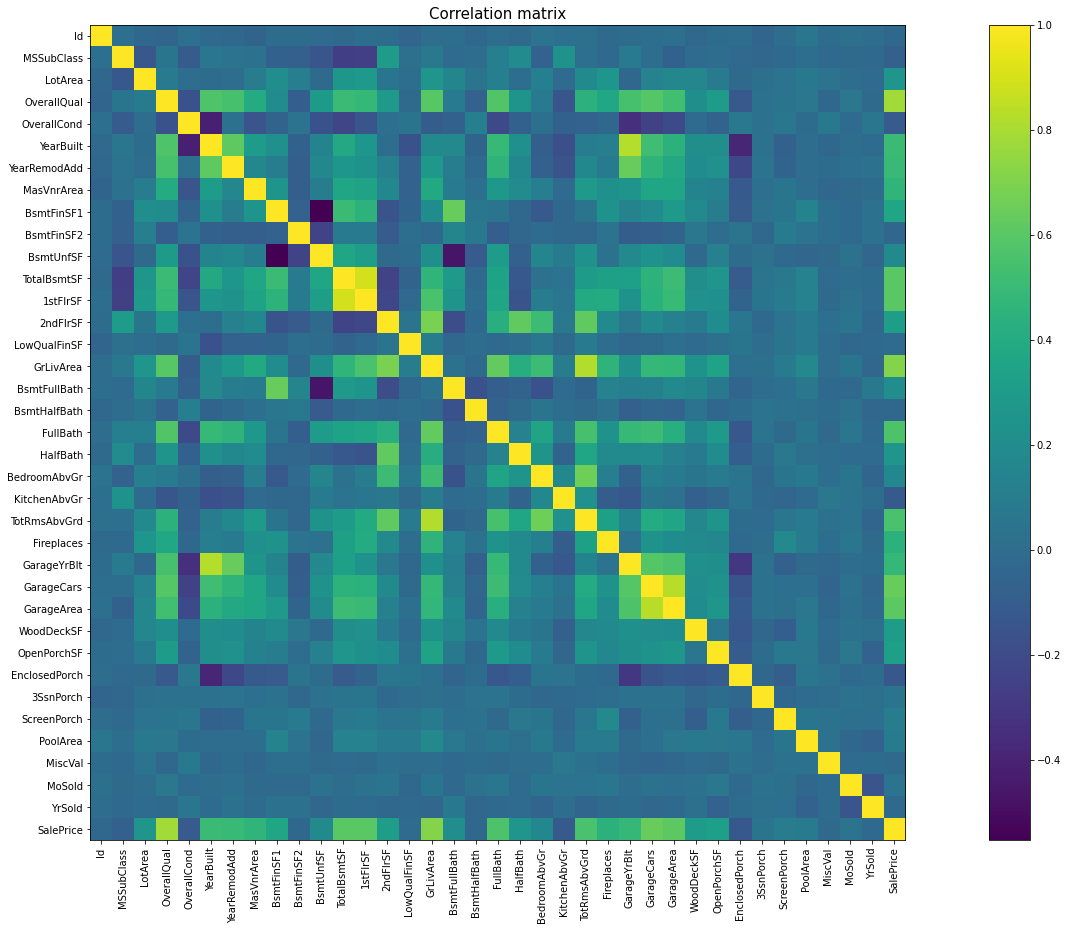

In [38]:
def plot_corr_matrix(data,figsize=(30,15)):
    #Начало вашего кода
    cor_matrix = data.corr()
    plt.rcParams['figure.figsize']=figsize
    heatmap = plt.imshow(cor_matrix)
    plt.colorbar()
    plt.title('Correlation matrix', fontsize=15)
    indices = np.arange(len(cor_matrix))
    plt.xticks(indices, data.columns.tolist())
    plt.yticks(indices, data.columns.tolist())
    plt.xticks(rotation=90)
    return heatmap
    #Конец вашего кода

plot_corr_matrix(data)

### Ожидаемый результат:

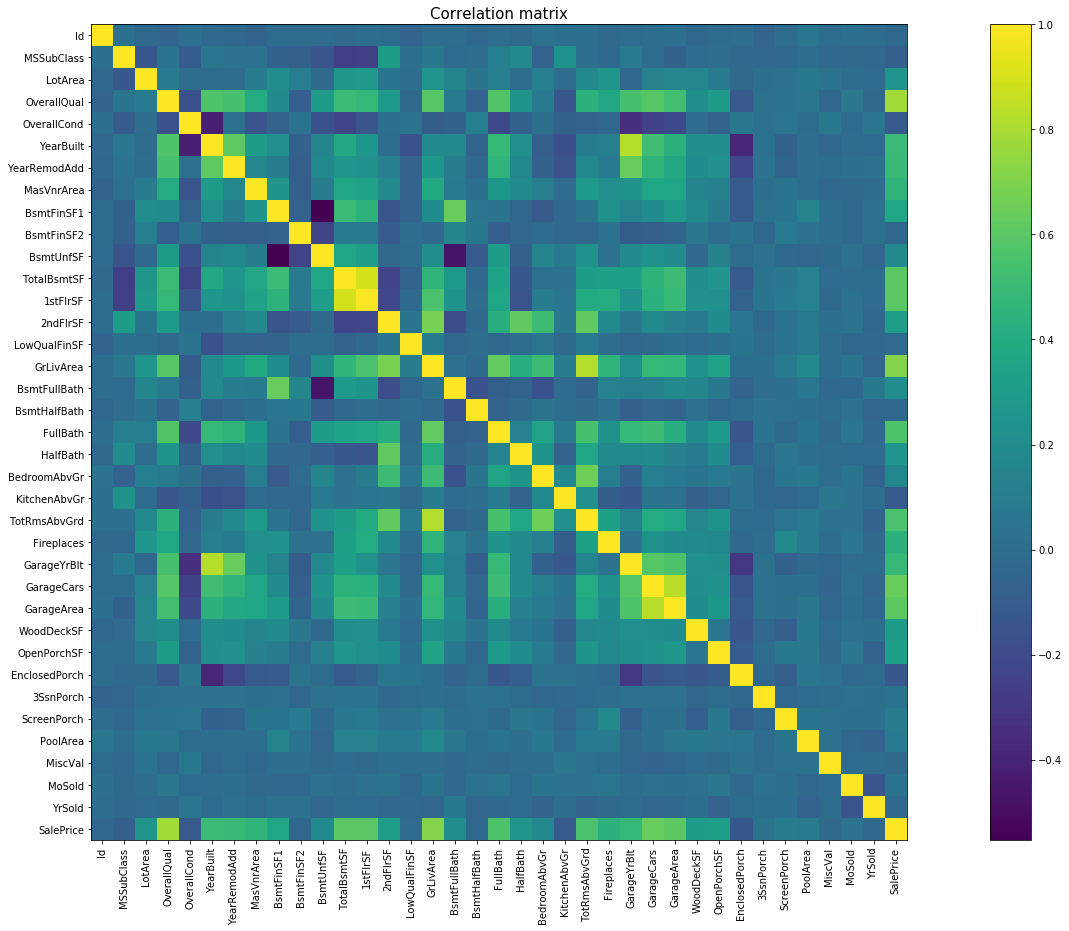


### Шаг 3

Отфильтруйте параметры, у которых коэффициенты корреляции (абсолютные значения) по отношению к параметру ```"SalePrice"``` больше или равно ```0.4```. Затем передайте отфильтрованный ```pandas.DataFrame``` в функцию ```plot_corr_matrix()``` и получите рисунок, как показано в ожидаемых результатах.

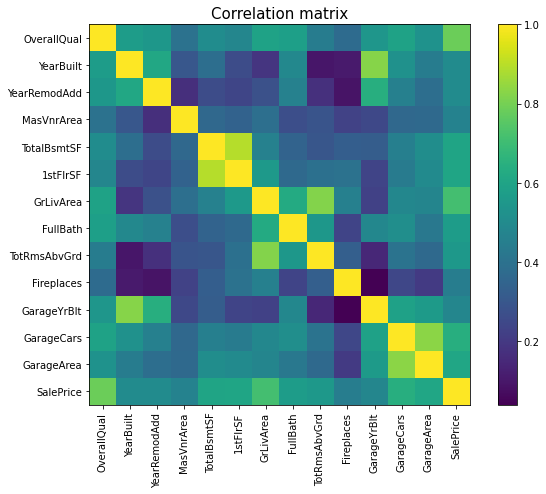

In [42]:
#Начало вашего кода
cor_matrix = data.corr()
target_cor_matrix = cor_matrix['SalePrice']
#print(target_cor_matrix)
filtered_columns = cor_matrix[abs(target_cor_matrix)>=0.4].index
#print(filtered_columns)
pd_data = data[filtered_columns]
#print(pd_data)
#pd_data = pd_data.dropna(axis=1, how='all')
#print(pd_data)
#Конец вашего кода
plot_corr_matrix(pd_data,figsize=(10,7))

### Ожидаемый результат:

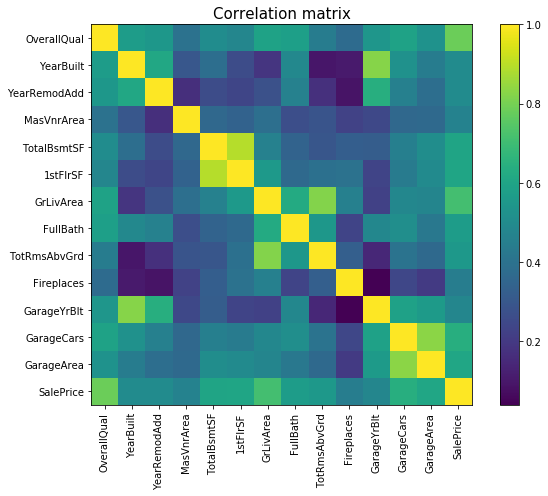


Отсортируйте параметры в порядке возрастания на основе коэффициентов корреляции относительно ```"SalePrice"```, значения которых больше или равны ```0.4```.

In [49]:
#Начало вашего кода
unsorted_v =target_cor_matrix[target_cor_matrix>=0.4]
sorted_v = unsorted_v.sort_values()
print(sorted_v)
#filtered_columns = cor_matrix[abs(target_cor_matrix)>=0.4]
#print(filtered_columns)
#Конец вашего кода
#print(sorted_coef)

Fireplaces      0.445434
MasVnrArea      0.465811
GarageYrBlt     0.481730
YearRemodAdd    0.501435
YearBuilt       0.504297
TotRmsAbvGrd    0.551821
FullBath        0.569313
TotalBsmtSF     0.602042
1stFlrSF        0.604714
GarageArea      0.607535
GarageCars      0.640154
GrLivArea       0.711706
OverallQual     0.783546
SalePrice       1.000000
Name: SalePrice, dtype: float64


### Ожидаемый результат:
```
Fireplaces      0.445434
MasVnrArea      0.465811
GarageYrBlt     0.481730
YearRemodAdd    0.501435
YearBuilt       0.504297
TotRmsAbvGrd    0.551821
FullBath        0.569313
TotalBsmtSF     0.602042
1stFlrSF        0.604714
GarageArea      0.607535
GarageCars      0.640154
GrLivArea       0.711706
OverallQual     0.783546
SalePrice       1.000000
Name: SalePrice, dtype: float64
```

### Шаг 4

Пожалуйста, реализуйте функцию ```plot_box_grid(data,figsize=(20,20))```, которая будет отображать ```boxplot``` для каждого столбца во входном аргументе pandas.DataFrame. Сетка должна быть квадратной, например ```2x2```, ```3x3```,```4x4``` и т. д., зависит от количества столбцов. Пожалуйста, сделайте обобщенную функцию, которая может обрабатывать различное количество столбцов в ```pandas.DataFrame```.

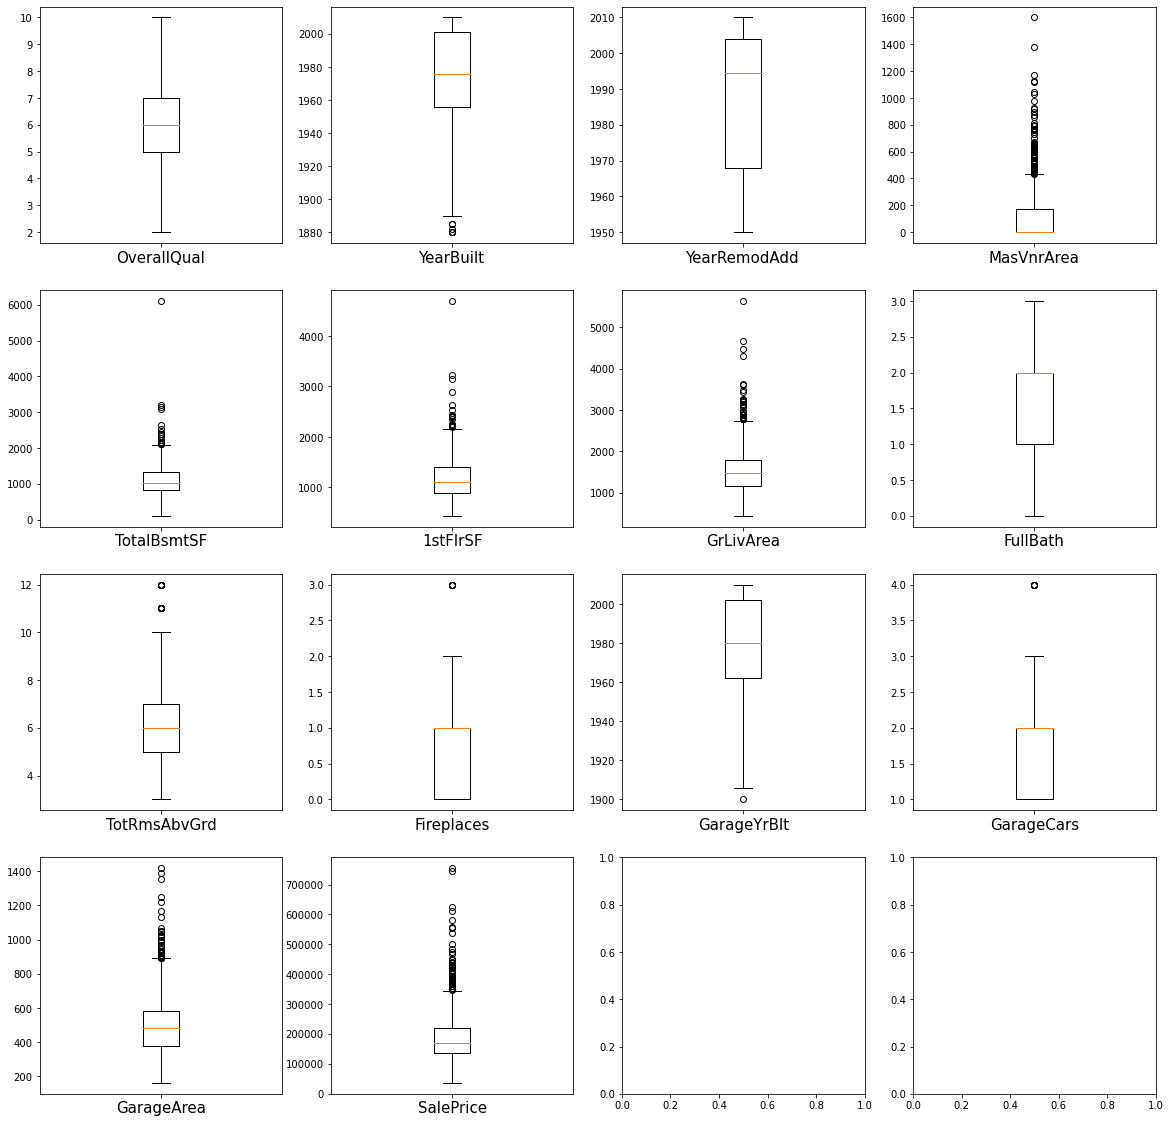

In [73]:
def plot_box_grid(data,figsize=(20,20)):
    #Начало вашего кода
    total_number_cols = len(data.columns)
    num_cols = math.ceil(math.sqrt(total_number_cols))
    num_rows = num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize = figsize)
        
    for i, column in enumerate(data.columns):
        row, col = divmod(i, num_cols)
        axs[row, col].boxplot(data[column], labels=[column])
        axs[row, col].set_xticklabels([column], fontsize = 15)
        #axs[row, col].set_title(f"{column}", fontsize = 15)
            
    
    #Конец вашего кода

plot_box_grid(pd_data)

In [1]:
import math

def plot_box_grid(data, figsize=(20, 20)):
    total_number_cols = len(data.columns)
    num_cols = math.ceil(math.sqrt(total_number_cols))
    num_rows = math.ceil(total_number_cols / num_cols)
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    # Flatten axs if it is a multidimensional array
    if axs.ndim > 1:
        axs = axs.flatten()
    
    # Remove excess subplots
    if total_number_cols < len(axs):
        for i in range(total_number_cols, len(axs)):
            fig.delaxes(axs[i])
    
    for i, column in enumerate(data.columns):
        axs[i].boxplot(data[column], labels=[column])
        axs[i].set_xticklabels([column], fontsize=15)
    
    plt.tight_layout()
    plt.show()


### Ожидаемый результат:

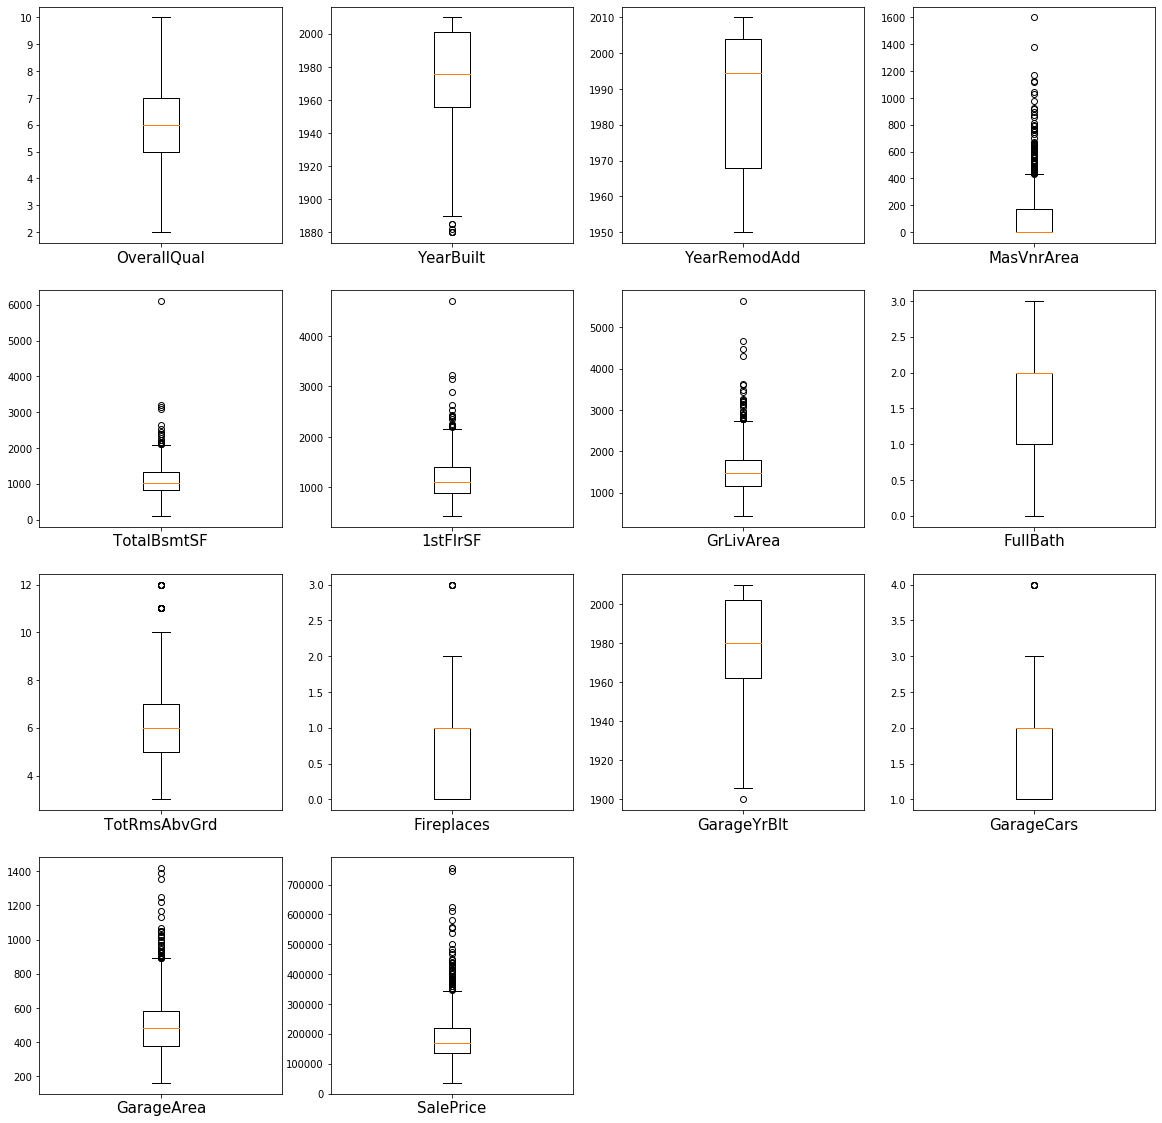

### Шаг 5

Пожалуйста, реализуйте функцию ```plot_prices_grid(data,top=10,figsize=(20,20))```, которая будет отображать сетку графиков с осью ```y``` как ```"SalePrice"``` и осью ```x``` с верхним числом параметров, с самыми высокими коэффициентами корреляции относительно ```"SalePrice"```. Сетка должна иметь формат ```2x2, 3x3, 4x4``` и т. д в зависимости от значения входного аргумента ```top```. Важно, если значение входного аргумента ```top``` больше, чем количество столбцов в ```pandas.DataFrame```, сетка должна зависеть от количества столбцов, а не от значения ```top```. Пожалуйста, обратитесь к ожидаемым результатам следующих 3 примеров.

**Примечание:**

* Вам может понадобиться следующая функция ```plt.subplots_adjust(hspace=0.3,wspace=0.1)```, чтобы отрегулировать расстояние между ```subplots```.
* Только самые левые ```subplots```, показывает ```label``` и значения по оси ```y```.
* Размер шрифта заголовков ```subplots``` установлен на 15.

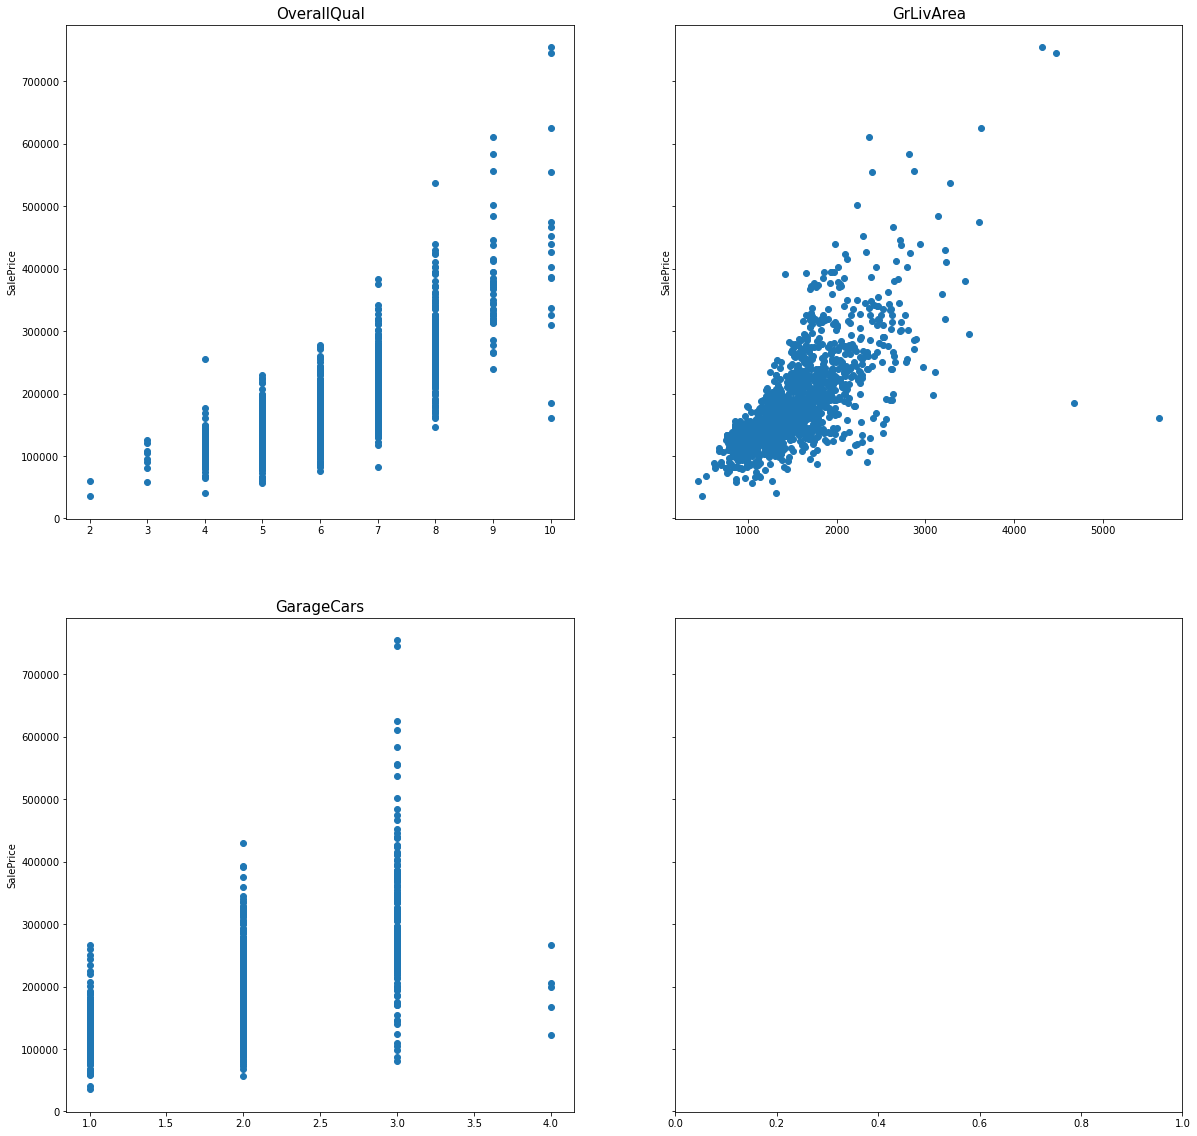

In [119]:
def plot_prices_grid(data,top=10,figsize=(20,20)):
    #Начало вашего кода
    import math
    corr_matrix = data.corr()
    
    corr_with_saleprice=corr_matrix['SalePrice'].sort_values(ascending = False)
    if top>len(corr_matrix):
        top_corr_params = corr_with_saleprice[1:]# Exclude 'SalePrice' itself
    else:
        top_corr_params = corr_with_saleprice[1:top+1]# Exclude 'SalePrice' itself
    
    total_number_cols = len(top_corr_params)
    num_cols = math.ceil(math.sqrt(total_number_cols))
    num_rows = num_cols
    
    fig, axs = plt.subplots(num_rows, num_cols, sharey =True, figsize = figsize)
    
    #return num_rows
    
    for i, param in enumerate(top_corr_params.index):
        row, col = divmod(i, num_cols)
        ax = axs[row, col]
        ax.scatter(data[param], data['SalePrice'])
        #ax.set_title(param)
        ax.set_title(param, fontsize = 15)
        ax.set_ylabel('SalePrice')
    #plt.show()
    

    #Конец вашего кода
#print(plot_prices_grid(pd_data,top=3))
plot_prices_grid(pd_data,top=3)


### Ожидаемый результат:

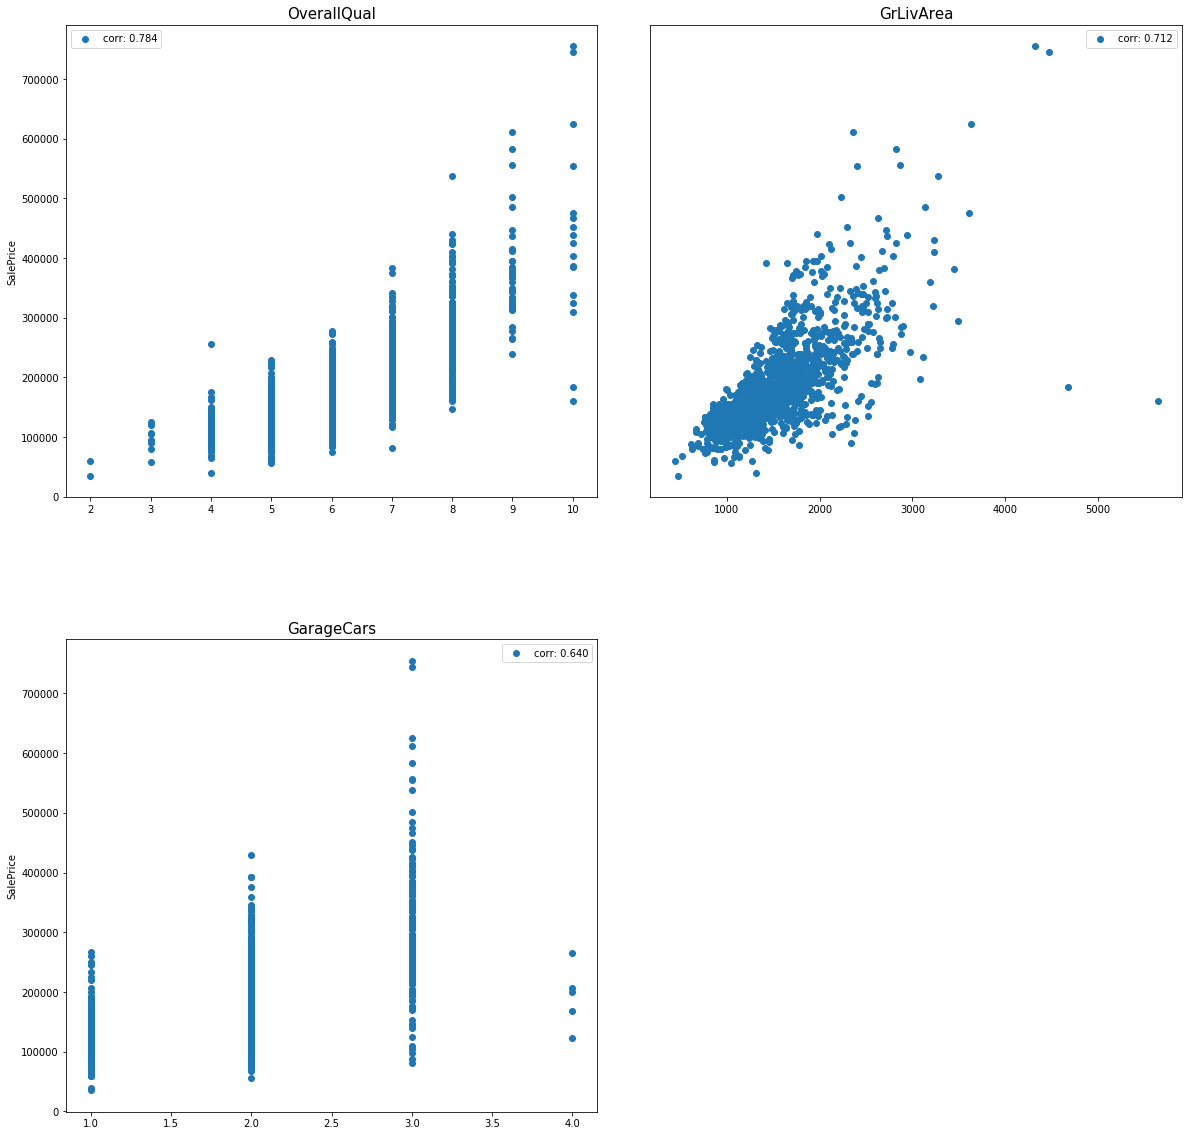

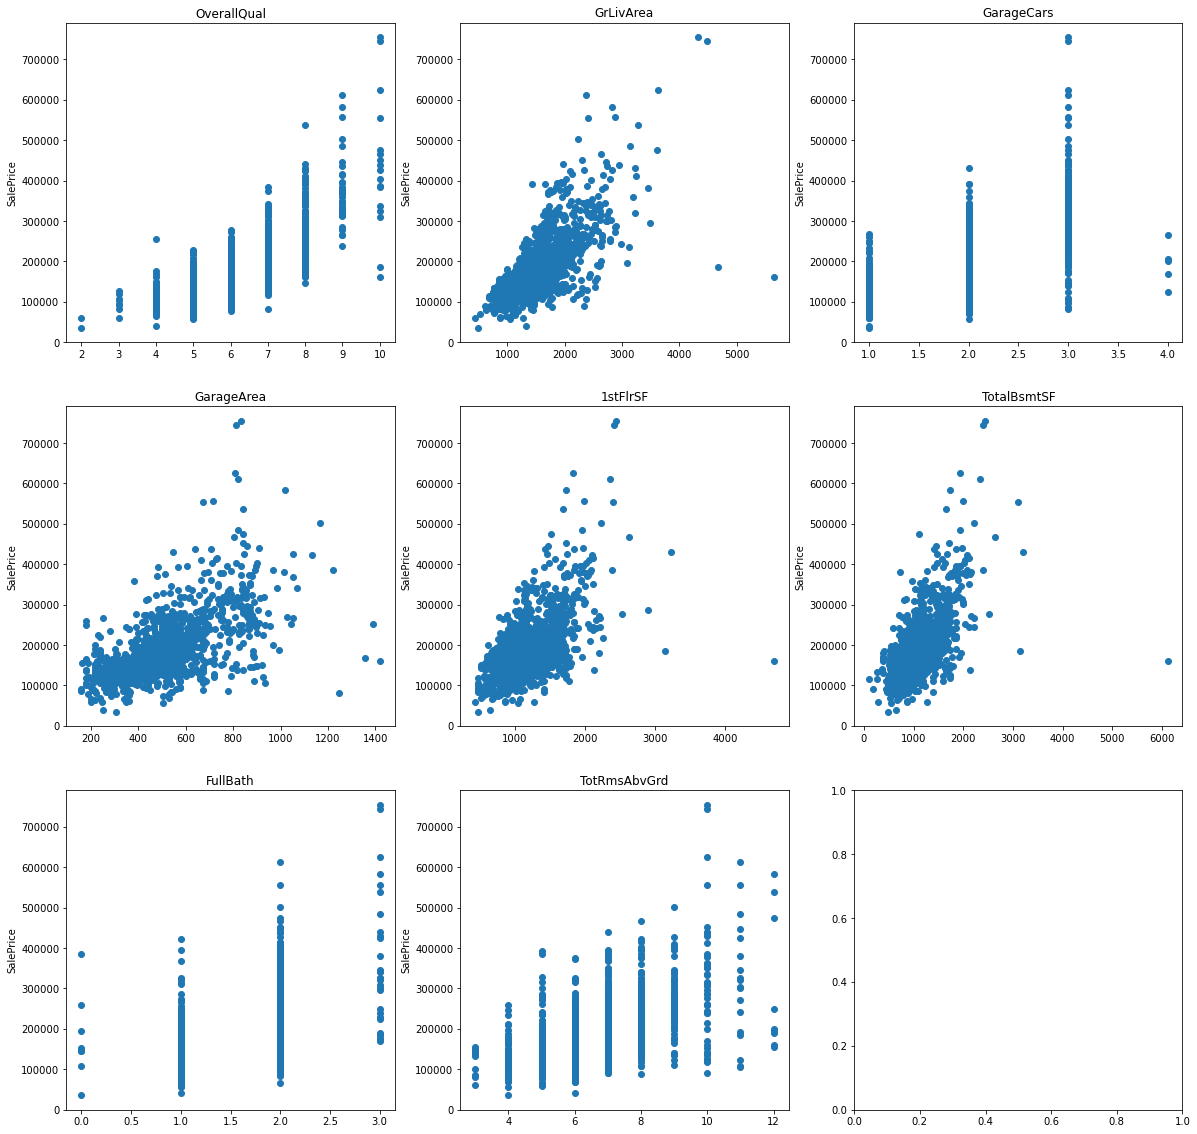

In [113]:
plot_prices_grid(pd_data,top=8)

### Ожидаемый результат:

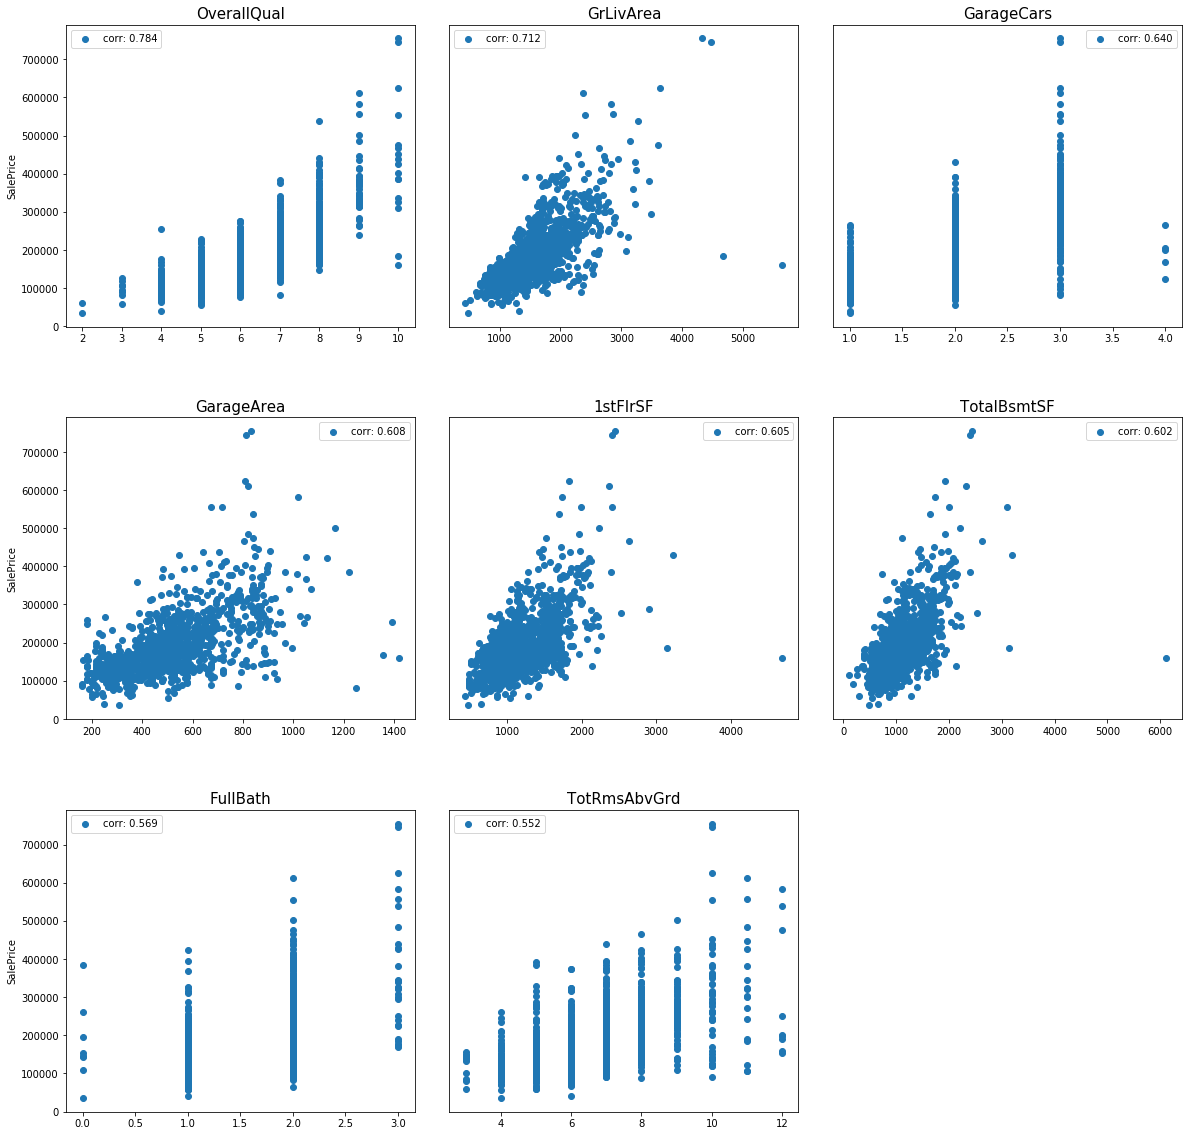

In [ ]:
plot_prices_grid(pd_data,top=30)

### Ожидаемый результат:

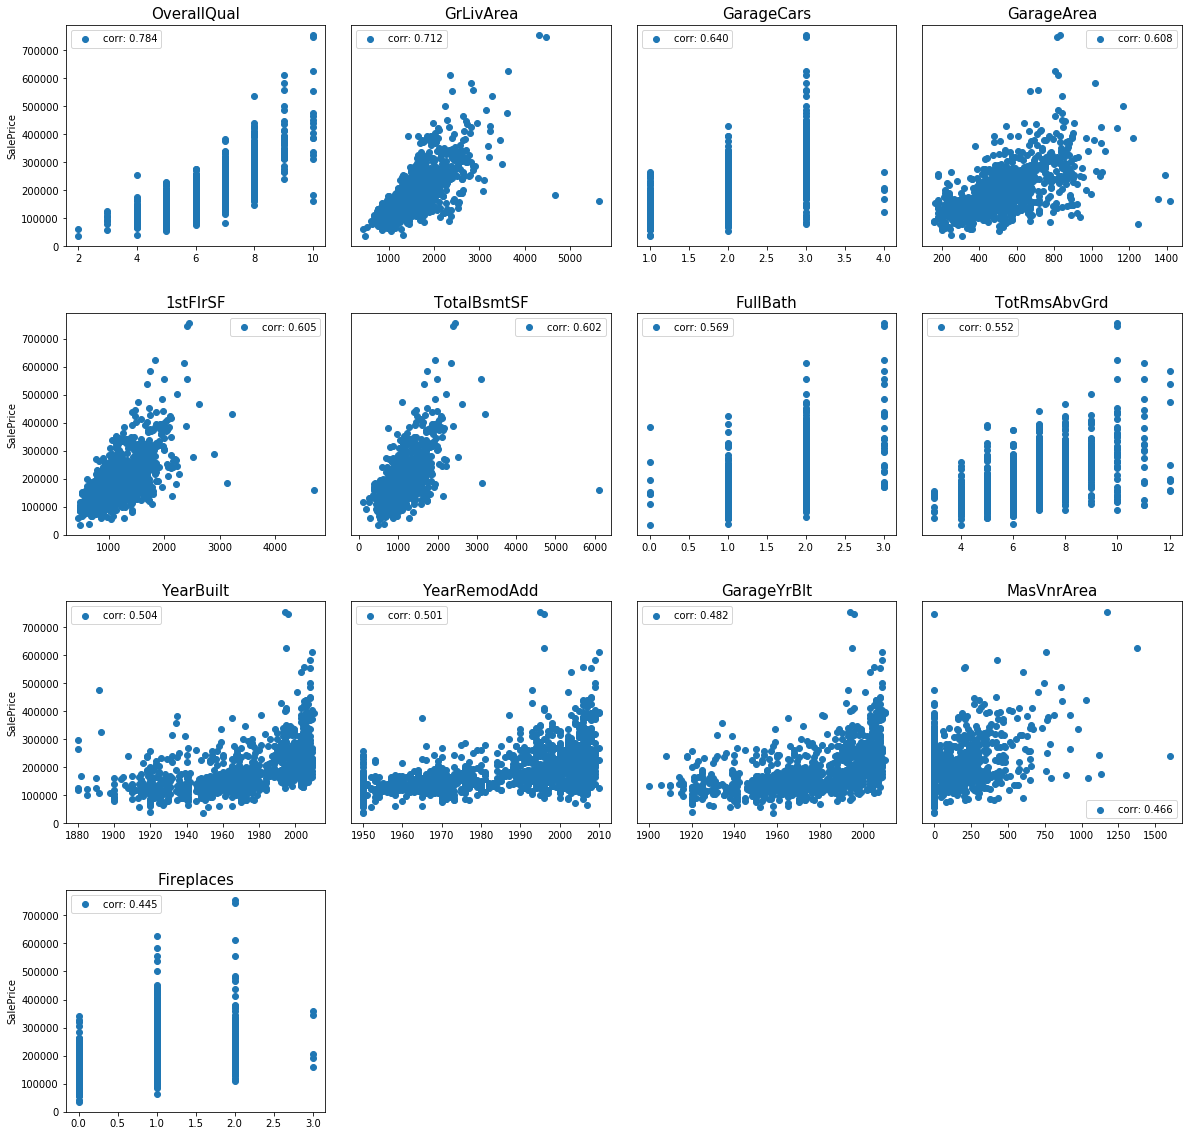

### Шаг 5:

Основываясь на всех шагах, какие у вас наблюдения? Чем больше, тем лучше.

In [ ]:
# Пожалуйста, напишите в блоке ниже:
'''


'''

# Прекрасная работа!